<a href="https://colab.research.google.com/github/Myst-Lee/Advanced-Machine-Learning/blob/main/WOA7015_GroupProject_Ming_Yi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# **Data Exploration**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iammustafatz/diabetes-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/iammustafatz/diabetes-prediction-dataset/versions/1


In [ ]:
diabetes_df = pd.read_csv(path + '/diabetes_prediction_dataset.csv')
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# Apply OneHot Encoding
diabetes_df['gender'] = diabetes_df['gender'].replace({'Other': np.nan})
diabetes_df['smoking_history'] = diabetes_df['smoking_history'].replace({'never': 0, 'current': 1, 'former': 2, 'ever': 3, 'not current': 4, 'No Info': np.nan})

diabetes_df.head()

<ipython-input-29-eb19a1d2ea5e>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diabetes_df['smoking_history'] = diabetes_df['smoking_history'].replace({'never': 0, 'current': 1, 'former': 2, 'ever': 3, 'not current': 4, 'No Info': np.nan})


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,0.0,25.19,6.6,140,0
1,Female,54.0,0,0,NaN,27.32,6.6,80,0
2,Male,28.0,0,0,0.0,27.32,5.7,158,0
3,Female,36.0,0,0,1.0,23.45,5.0,155,0
4,Male,76.0,1,1,1.0,20.14,4.8,155,0


In [ ]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
smoking_history,64184.0,1.025022,1.358469,0.00,0.00,0.00,2.00,4.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [ ]:
diabetes_df.isnull().sum()

,0
gender,18
age,0
hypertension,0
heart_disease,0
smoking_history,35816
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
diabetes_df = diabetes_df.dropna()
diabetes_df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
male_data = diabetes_df[diabetes_df['gender'] == "Male"]
female_data = diabetes_df[diabetes_df['gender'] == "Female"]
dd
male_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2,Male,28.0,0,0,0.0,27.32,5.7,158,0
4,Male,76.0,1,1,1.0,20.14,4.8,155,0
8,Male,42.0,0,0,0.0,33.64,4.8,145,0
16,Male,15.0,0,0,0.0,30.36,6.1,200,0
19,Male,37.0,0,0,3.0,25.72,3.5,159,0


In [ ]:
female_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,0.0,25.19,6.6,140,0
3,Female,36.0,0,0,1.0,23.45,5.0,155,0
5,Female,20.0,0,0,0.0,27.32,6.6,85,0
6,Female,44.0,0,0,0.0,19.31,6.5,200,1
9,Female,32.0,0,0,0.0,27.32,5.0,100,0


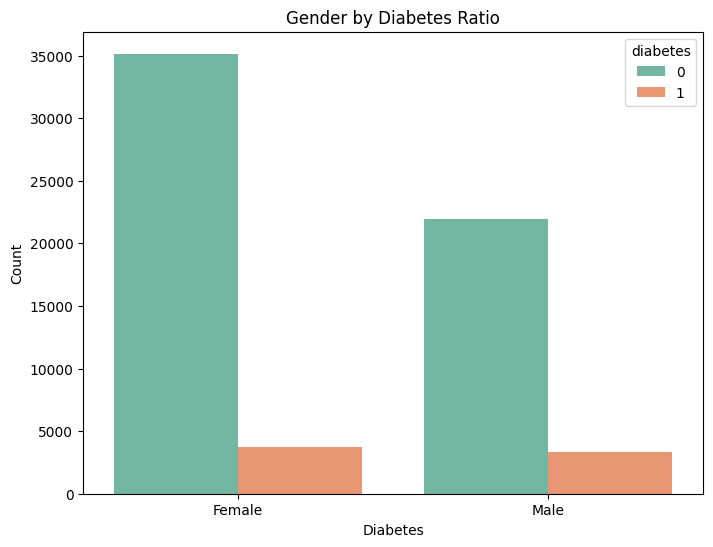

In [ ]:
# prompt: plot gender by diabetes

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'diabetes_df' is your DataFrame as defined in the preceding code.

plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='diabetes', data=diabetes_df, palette="Set2")
plt.title('Gender by Diabetes Ratio')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

Text(0.5, 0.98, 'Male Diabetes Parameter Histogram')

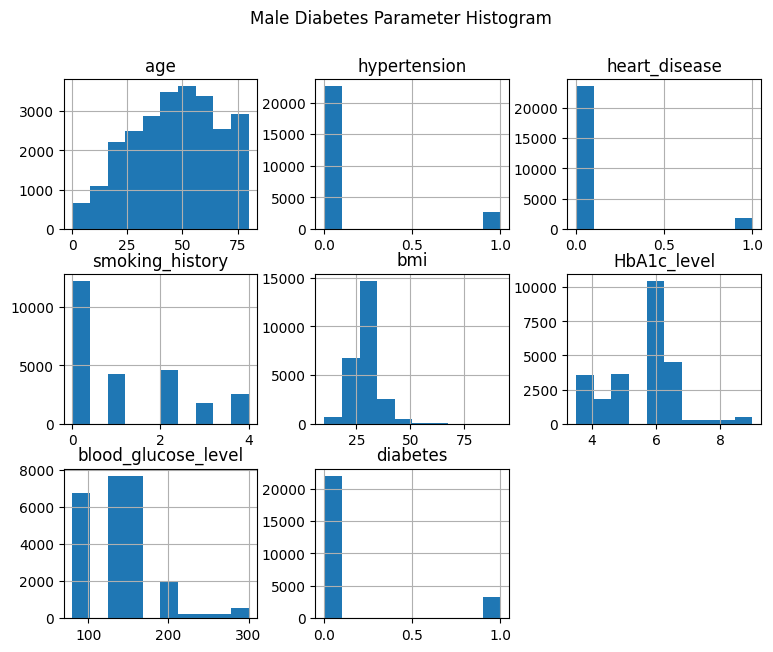

In [ ]:
male_data.hist(figsize = (9,7))
plt.suptitle("Male Diabetes Parameter Histogram")

Text(0.5, 0.98, 'Female Diabetes Parameter Histogram')

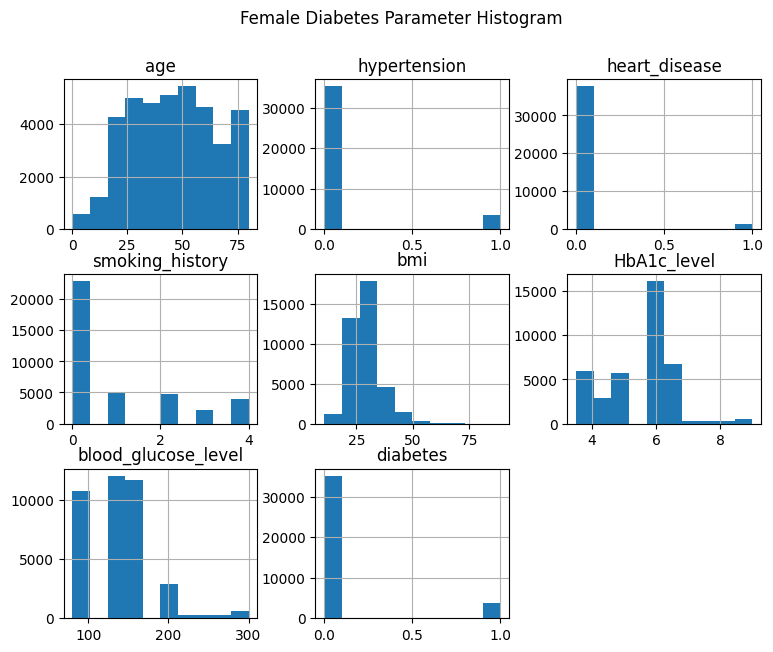

In [ ]:
female_data.hist(figsize = (9,7))
plt.suptitle("Female Diabetes Parameter Histogram")

# **Data Preprocessing**

Scaling the Data

In [ ]:
features= ['age', 'hypertension', 'heart_disease', 'smoking_history','bmi', 'HbA1c_level', 'blood_glucose_level']
target = 'diabetes'

male_data = diabetes_df[diabetes_df['gender'] == "Male"]
female_data = diabetes_df[diabetes_df['gender'] == "Female"]

# Multi task learning
X = diabetes_df[features]
y_male = (diabetes_df['gender'] == "Male").astype(int)*diabetes_df[target]
y_female = (diabetes_df['gender'] == "Female").astype(int)*diabetes_df[target]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(diabetes_df[features])

X_train, X_test, y_train_male, y_test_male, y_train_female, y_test_female = train_test_split(
    X_scaled, y_male, y_female, test_size=0.2, random_state=42
)

# **Model Training**

In [ ]:
def create_dataset(X, y_male, y_female, batch_size=32, shuffle=True):
    # Combine inputs and outputs into a dataset
    dataset = torch.data.Dataset.from_tensor_slices((X, {'male_output': y_male, 'female_output': y_female}))

    # Shuffle and batch the dataset
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(X))
    dataset = dataset.batch(batch_size).prefetch(buffer_size=torch.data.AUTOTUNE)

    return dataset

In [ ]:
batch_size = 64

# Creating datasets using TensorDataset
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train_male.values, dtype=torch.float32))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test_male.values, dtype=torch.float32))

# Creating data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
class MultiLayerNet(torch.nn.Module):
    def __init__(self, input_size, frst_hidden_neurons, scnd_hidden_neurons, output_size):
        super(MultiLayerNet, self).__init__()
        self.first_hidden_layer = torch.nn.Linear(input_size, frst_hidden_neurons)
        self.second_hidden_layer = torch.nn.Linear(frst_hidden_neurons, scnd_hidden_neurons)
        self.output_layer = torch.nn.Linear(scnd_hidden_neurons, output_size)
        self.dropout = torch.nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.first_hidden_layer(x))
        x = self.dropout(x)
        x = torch.softmax(self.second_hidden_layer(x), dim=1)
        x = self.dropout(x)
        x = torch.sigmoid(self.output_layer(x))

        return x

In [ ]:
learningRate = 0.001
epochs = 1000

model = MultiLayerNet(7, 16, 16, 1)
if torch.cuda.is_available():
    model.cuda()

criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)

In [ ]:
training_loss = []
eval_loss = []
acc_list = []

for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
      optimizer.zero_grad()
      outputs = model(X_batch)
      y_batch = y_batch.unsqueeze(1)
      loss = criterion(outputs, y_batch)
      loss.backward()

      # update parameters
      optimizer.step()

    if epoch % 100 == 0:
      print('epoch {}, loss {}'.format(epoch, loss.item()))

    training_loss.append(loss.item())


    # Validation
    for x__val_batch, y__val_batch in test_loader:
      # model.eval()
      val_outputs = model(x__val_batch)
      y__val_batch = y__val_batch.unsqueeze(1)
      val_loss = criterion(val_outputs, y__val_batch)

      acc = (val_outputs.round() == y__val_batch).float().mean()

    if epoch % 100 == 0:
      print("Model accuracy: %.2f%%" % (float(acc)*100))
      print('epoch {}, val_loss {}\n'.format(epoch, val_loss.item()))


    eval_loss.append(val_loss.item())
    acc_list.append(float(acc))

epoch 0, loss 0.21844588220119476
Model accuracy: 91.43%
epoch 0, val_loss 0.2699469029903412

epoch 100, loss 0.1624033898115158
Model accuracy: 88.57%
epoch 100, val_loss 0.14799688756465912

epoch 200, loss 0.02228434383869171
Model accuracy: 94.29%
epoch 200, val_loss 0.11569835245609283

epoch 300, loss 0.21543660759925842
Model accuracy: 94.29%
epoch 300, val_loss 0.12977825105190277

epoch 400, loss 0.3178327679634094
Model accuracy: 91.43%
epoch 400, val_loss 0.12082481384277344

epoch 500, loss 0.05734401196241379
Model accuracy: 91.43%
epoch 500, val_loss 0.1441304236650467

epoch 600, loss 0.023028375580906868
Model accuracy: 91.43%
epoch 600, val_loss 0.12542663514614105

epoch 700, loss 0.24867457151412964
Model accuracy: 94.29%
epoch 700, val_loss 0.12397794425487518

epoch 800, loss 0.00801308173686266
Model accuracy: 94.29%
epoch 800, val_loss 0.11031851172447205

epoch 900, loss 0.06681329756975174
Model accuracy: 91.43%
epoch 900, val_loss 0.09944435954093933



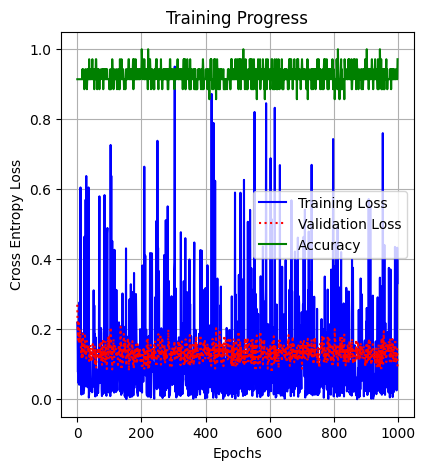

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_loss, linestyle='-', color='b', label='Training Loss')
plt.plot(eval_loss, linestyle=':', color='r', label='Validation Loss')
plt.plot(acc_list, linestyle='-', color='g', label='Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Training Progress')

plt.grid(True)

# Show legend
plt.legend()

In [ ]:
def evaluate_model(model, test_loader, criterion):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():  # Disable gradient calculations during evaluation
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            y_batch = y_batch.unsqueeze(1)
            loss = criterion(outputs, y_batch)
            total_loss += loss.item() * X_batch.size(0)

            # Calculate accuracy
            predicted_labels = (outputs >= 0.5).float()
            correct_predictions += (predicted_labels == y_batch).sum().item()
            total_samples += X_batch.size(0)

    avg_loss = total_loss / total_samples
    accuracy = correct_predictions / total_samples

    return avg_loss, accuracy

# Evaluate the model
avg_loss, accuracy = evaluate_model(model, test_loader, criterion)
print(f"Loss: {avg_loss}, Accuracy: {accuracy}")

Loss: 0.12034090219314432, Accuracy: 0.9474873393065836


In [ ]:
# Predicting for male and female tasks
with torch.no_grad():
    predictions = model(torch.tensor(test_dataset.tensors[0], dtype=torch.float32))
male_predictions = predictions[0]  # Male task predictions
female_predictions = predictions[1]  # Female task predictions

<ipython-input-82-0ce971d2efb7>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  predictions = model(torch.tensor(test_dataset.tensors[0], dtype=torch.float32))
